##### 第一题
 Given $\{X_1,X_2,...,X_n \}$ be the random sample of $X$ with the mean $\mu$ and the variance $\sigma^2$,prove $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\to^{d}N(0,1)$

Given $M_X(t) = e^{\frac{1}{2}t^2}$,for $X\sim N(0,1)$

Thus $M_{Y}(t) = e^{\frac{1}{2}t^2}$,for $X\sim N(0,1) \Leftrightarrow Y\to^{d}N(0,1) $,for $Y = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ whose MGF is exist for all $t$

\begin{aligned}
    M_{Y}(t) &=  E(e^{tY}) = E(e^{t\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}})\\
    &= E(e^{t\frac{\sum X_i - \mu}{\sigma/\sqrt{n}}})   \\
    &= E(e^{\frac{t}{\sqrt{n}}\sum\frac{X_i - \mu}{\sigma}})\\
    &= E(e^{\frac{t}{\sqrt{n}}\frac{X_1 - \mu}{\sigma}})...E(e^{\frac{t}{\sqrt{n}}\frac{X_n - \mu}{\sigma}})\\
    &= E(e^{\frac{t}{\sqrt{n}}\frac{X_n - \mu}{\sigma}})^n  \\
    &= M_{\frac{X_n - \mu}{\sigma}}(\frac{t}{\sqrt{n}})^n   \\
\end{aligned}

By the Taylor's Theorem:
\begin{aligned}
    M_{\frac{X_n - \mu}{\sigma}}(\frac{t}{\sqrt{n}}) &= 1+\frac{t}{\sqrt{n}}E(\frac{X_n - \mu}{\sigma}) + \frac{(\frac{t}{\sqrt{n}})^2}{2}E(\frac{X_n - \mu}{\sigma})^2 + (\frac{t}{\sqrt{n}})^2*h(\frac{t}{\sqrt{n}})  \\
    &= 1+\frac{(\frac{t}{\sqrt{n}})^2}{2}+ (\frac{t}{\sqrt{n}})^2*h(\frac{t}{\sqrt{n}})  \\
\end{aligned}

Thus,we have $$ M_{Y}(t) = M_{\frac{X_n - \mu}{\sigma}}(\frac{t}{\sqrt{n}})^n = (1+\frac{(\frac{t}{\sqrt{n}})^2}{2}+ (\frac{t}{\sqrt{n}})^2*h(\frac{t}{\sqrt{n}}))^n $$
$$ \lim_{n\to\infty} M_{Y}(t)  = \lim_{n\to\infty}(1+\frac{(\frac{t}{\sqrt{n}})^2}{2}+ (\frac{t}{\sqrt{n}})^2*h(\frac{t}{\sqrt{n}}))^n = e^{\frac{t^2}{2}} $$

Consequently,we know that $Y = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$

+ For a general case that MGF is not necessarily exist, refer to https://doi.org/10.1198/tast.2010.09159

##### 第二题

In R or Python, assign a matrix
\begin{array}{cccc}
1 & 0.5 & 0.3 & 0.1 \\
0.5 & 1 & 0.5 & 0.3 \\
0.3 & 0.5 & 1 & 0.5 \\
0.1 & 0.3 & 0.5 & 1
\end{array}
to a letter $A$, and compute $A^2 = A^T A$ and $A^{−1}$. Find the eigenvalues and the corresponding eigenvectors of A.

In [19]:
import numpy as np
A = np.array([[1, 0.5, 0.3, 0.1],
[0.5, 1, 0.5, 0.3],
[0.3, 0.5, 1, 0.5],
[0.1, 0.3, 0.5, 1],])
A_2 = np.dot(A.T, A)
A_inv = np.linalg.inv(A)
eigen_value,eigen_vector = np.linalg.eig(A)
print(f'A^2 = {A_2}\n\n A^{-1} = {A_inv}\n\neigen_value = {eigen_value}\n\neigen_vector = {eigen_vector}')

A^2 = [[1.35 1.18 0.9  0.5 ]
 [1.18 1.59 1.3  0.9 ]
 [0.9  1.3  1.59 1.18]
 [0.5  0.9  1.18 1.35]]

 A^-1 = [[ 1.35233035 -0.63994204 -0.15213716  0.13281816]
 [-0.63994204  1.64211543 -0.55300652 -0.15213716]
 [-0.15213716 -0.55300652  1.64211543 -0.63994204]
 [ 0.13281816 -0.15213716 -0.63994204  1.35233035]]

eigen_value = [2.12462113 0.98284271 0.47537887 0.41715729]

eigen_vector = [[ 0.43516215  0.65328148  0.55734541 -0.27059805]
 [ 0.55734541  0.27059805 -0.43516215  0.65328148]
 [ 0.55734541 -0.27059805 -0.43516215 -0.65328148]
 [ 0.43516215 -0.65328148  0.55734541  0.27059805]]


##### 第三题



Simulate the three curtain games in our slides and estimate the proportion of winning
that you change the choices. 

Plot the graph.

In [1]:
from scipy.stats import rv_discrete
import numpy as np
k=10
n = 100
values,prob = [1,2,3],np.array([1/3,1/3,1/3])
reduced_prob = np.array([0.5,0.5])
result = []
for j in range(k):
    correct = np.array([0,0])
    for i in range(n):
        prize = rv_discrete(values=(values,prob)).rvs()
        first_choice = rv_discrete(values=(values,prob)).rvs()
        if prize == first_choice:
            reveal = rv_discrete(values=(values ,prob),badvalue=prize).rvs()
            change_choice = rv_discrete(values=(values,prob),badvalue=first_choice).rvs()
        else:
            reveal = [i for i in values if (i!=prize) & (i!=first_choice)][0]
            change_choice = [i for i in values if (i!=reveal)& (i!=first_choice)][0]
        correct[0] += (first_choice==prize)
        correct[1] += (change_choice==prize)
    correct = correct/sum(correct)
    result.append(correct)
result = np.array(result)
real_correct = [1/3,2/3]

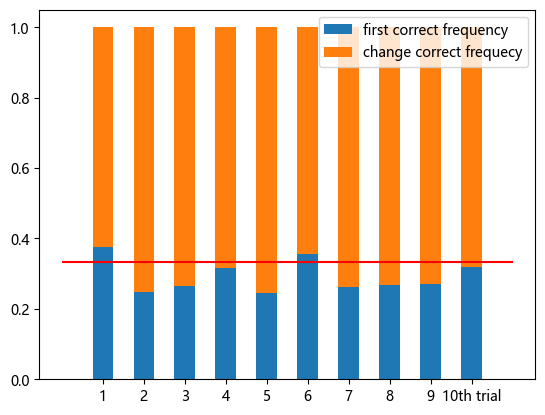

In [12]:
import matplotlib.pyplot as plt
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(10)

names = ('1','2','3','4','5','6','7','8','9','10th trial')
counts = {'first correct frequency':result[:,0],
          'change correct frequecy':result[:,1]}

for boolean, weight_count in counts.items():
    p = ax.bar(x = names, height = weight_count, width = width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.legend(loc="upper right")
ax.hlines(y = 1/3,xmin=-1,xmax=10,colors=['r'])

plt.show()

##### 第四题
 Generate the probability result of the game 博饼
   + ![](https://pic3.zhimg.com/v2-807a91b3df49a52d6755799d8547cb46_r.jpg)

In [13]:
import math
def split(sample,num_dies):
    runs = int(math.modf(len(sample)/num_dies)[-1])
    sample = sample[:runs*num_dies].reshape([runs,num_dies])
    return sample

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
from numpy import array
from numpy import where,sum
def is_jinhua(set):
    return sum(where(set==4,1,0))==4 & sum(where(set==2,1,0))==2

def is_liuhong(set):
    return sum(where(set==4,1,0))==6 

def is_liuhei(set):
    return sum(where(set==6,1,0))==6 

def is_wuwang(set):
    return sum(where(set==4,1,0))==5 

def is_wuzi(set):
    return sum(where(set==6,1,0))==5

def is_zhuangyuan(set):
    return sum(where(set==6,1,0))==4

def is_duitang(set):
    indicator = (array([sum(where(set==i,1,0))==1 for i in range(1,7)]))
    return sum(indicator)==len(indicator)

def is_sanhong(set):
    return sum(where(set==4,1,0))==3

def is_sijin(set):
    return sum(where(set==2,1,0))==4

def is_erju(set):
    return sum(where(set==4,1,0))==2

def is_yixiu(set):
    return sum(where(set==4,1,0))==1

In [15]:
def result(sample):
    sample = split(sample,6)
    jinhua = [is_jinhua(i) for i in sample]
    liuhong = [is_liuhong(i) for i in sample]
    liuhei = [is_liuhei(i) for i in sample]
    wuwang = [is_wuwang(i) for i in sample]
    wuzi = [is_wuzi(i) for i in sample]
    zhuangyuan = [is_zhuangyuan(i) for i in sample]
    duitang = [is_duitang(i) for i in sample]
    sanhong = [is_sanhong(i) for i in sample]
    sijin = [is_sijin(i) for i in sample]
    erju = [is_erju(i) for i in sample]
    yixiu = [is_yixiu(i) for i in sample]
    X = sum(array([jinhua,liuhong,liuhei,wuwang,wuzi,zhuangyuan,duitang,sanhong,sijin,erju,yixiu]),axis=1)
    return X

In [16]:
def generate_sample(n):
    prob_value = (array([1,2,3,4,5,6]),array([1/6,1/6,1/6,1/6,1/6,1/6]))
    num_dies = 6
    die = rv_discrete(a=1,b=6,values=prob_value)
    rst = die.rvs(size=n)
    return rst


In [17]:
from scipy.special import factorial
def bino_pmf(n,p,k):
    return factorial(n)/(factorial(k)*factorial(n-k))*(p**k)*(1-p)**(n-k)
probs = bino_pmf(6,1/6,array([6,6,6,5,5,4,6,3,4,2,1]))

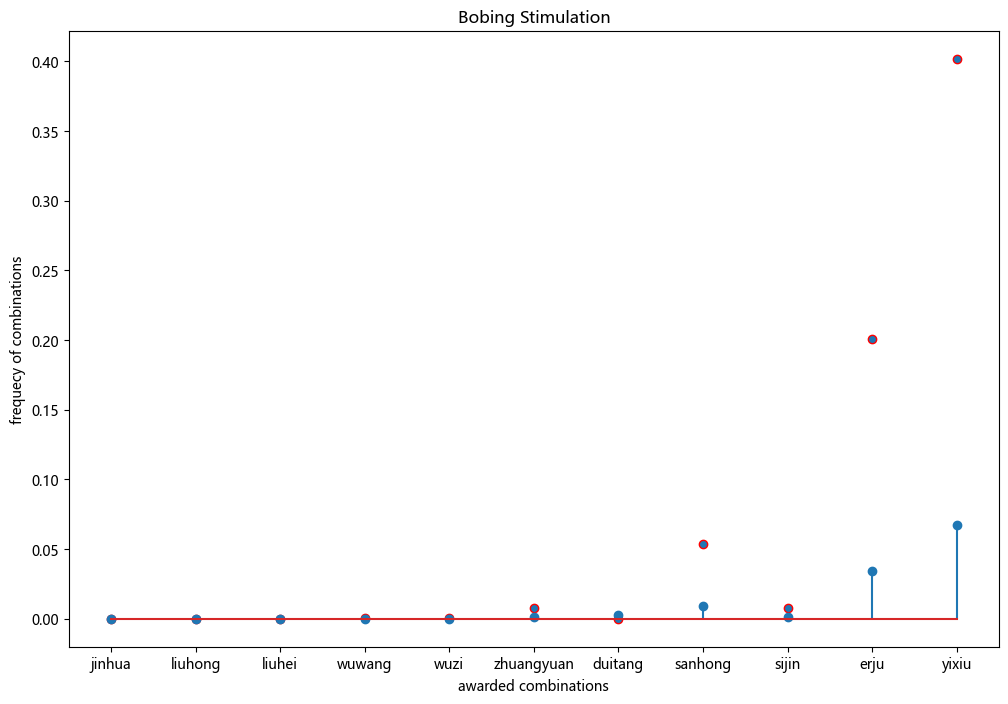

In [18]:
n = 500000
sample = generate_sample(n)
fig, ax = plt.subplots(figsize=(12, 8))
names = ['jinhua','liuhong','liuhei','wuwang','wuzi','zhuangyuan','duitang','sanhong','sijin','erju','yixiu']
count = result(sample)/n
plt.stem(names,count)
ax.scatter(names,probs,edgecolors='r')
plt.xlabel('awarded combinations')
plt.ylabel('frequecy of combinations')
plt.title('Bobing Stimulation')
plt.show()